In [18]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the data

In [24]:
with open('initial_dynamics.npy', 'rb') as f: 
    Wsoc = np.load(f) #[N,N]
    x0 = np.load(f) #[N,1]

### Neuronal Dynamics
***
$\mathbf{\text{Euler method}}$<br>
***
&emsp;$$\tau \frac{dx}{dt} = -x + Wf\left(x, g\right)$$
&emsp;$$ \tau \frac{x(t+\Delta t) - x(t)}{\Delta t} = -x + Wf\left(x, g\right) $$
&emsp;&emsp;&emsp; $$ x(t+\Delta t) = x(t) +\frac{\Delta t}{\tau} \Bigg[-x(t) + Wf\left(x(t), g\right)\Bigg] $$
***

In [119]:
N = x0.shape[0] #Number of neurons
g0 = np.ones(x0.shape) #Vector of gains [N,1]  
tf = 2500 #Final time for the dynamics

#Constants along the dynamics
r0, rmax = 20, 100
tau = 200

In [120]:
#Define the non - linear function
def f(x,g): #x:[N,1] g:[N,1]
    mask = x < 0
    R = np.zeros(x.shape) #[N,1]
    R[mask] = r0
    R[~mask] = rmax - r0  
    
    return R*np.tanh(x*g*(1./R)) #[N,1]

In [121]:
def euler_solution(x0, tf, n_time):
    x = np.zeros((N,n_time)) #[N,n_time]
    x[:,0] = x0.squeeze() #Set the initial dynamics 
    delta_t = tf/n_time
    #Solve the dynamics with the Euler method
    for time in range(1,n_time):
        x_past = x[:,time -1] #[N,]
        x_past = np.expand_dims(x_past, 1) #[N,1]
        F = np.matmul(Wsoc, f(x_past,g0)) #[N,1]
        x_present = x_past + (delta_t/tau)*(-x_past + F) #[N,1]
    
        x[:,time] = x_present.squeeze()
    return x    

## Plots for diferent $\Delta t$ values changing the number of time points 

<ipython-input-129-8f8f0cba4686>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


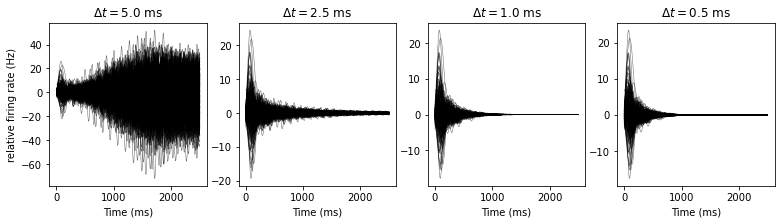

In [129]:
x = euler_solution(x0, tf = 2500, n_time = 500)
x1 = euler_solution(x0, tf = 2500, n_time = 1000)
x2 = euler_solution(x0, tf = 2500, n_time = 2500)
x3 = euler_solution(x0, tf = 2500, n_time = 5000)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize = (13,3), ncols = 4)
ax0.plot(np.linspace(0,2500,500), x.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax0.set_xlabel('Time (ms)') 
ax0.set_ylabel('relative firing rate (Hz)') 
ax0.set_title('$\Delta t = $'+ str(tf/500) + ' ms' )
ax1.plot(np.linspace(0,tf,1000), x1.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax1.set_xlabel('Time (ms)') 
ax1.set_title('$\Delta t = $'+ str(tf/1000) + ' ms') 
ax2.plot(np.linspace(0,tf,2500), x2.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax2.set_xlabel('Time (ms)') 
ax2.set_title('$\Delta t = $'+ str(tf/2500) + ' ms') 
ax3.plot(np.linspace(0,tf,5000), x3.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax3.set_xlabel('Time (ms)') 
ax3.set_title('$\Delta t = $'+ str(tf/5000) + ' ms') 

fig.show()

### Let's implement now a RK-4 

In [127]:
def f_dynamics(x,g):
    F = np.matmul(Wsoc, f(x,g)) #[N,1]
    return (1/tau)*(-x + F)

def RK4(x0, tf, n_time):
    x = np.zeros((N,n_time)) #[N,n_time]
    x[:,0] = x0.squeeze() #Set the initial dynamics 
    h = tf/n_time #delta time in RK4
    
    for time in range(1,n_time):
        x_past = x[:,time-1] #[N,]
        x_past = np.expand_dims(x_past, 1) #[N,1]
        
        k1 = f_dynamics(x_past, g0)
        k2 = f_dynamics(x_past + (h/2)*k1, g0)
        k3 = f_dynamics(x_past + (h/2)*k2, g0)
        k4 = h*f_dynamics(x_past + h*k3, g0)
        
        x_present = x_past + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
        x[:,time] = x_present.squeeze() 
    return x  

<ipython-input-130-13060e772ba5>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


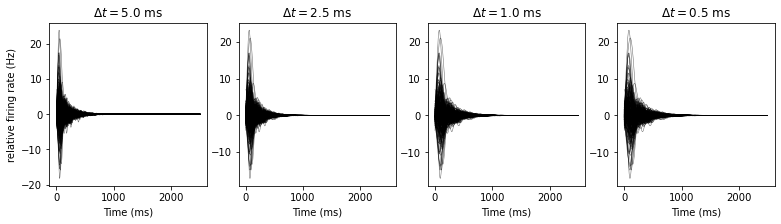

In [130]:
x = RK4(x0, tf = 2500, n_time = 500)
x1 = RK4(x0, tf = 2500, n_time = 1000)
x2 = RK4(x0, tf = 2500, n_time = 2500)
x3 = RK4(x0, tf = 2500, n_time = 5000)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize = (13,3), ncols = 4)
ax0.plot(np.linspace(0,2500,500), x.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax0.set_xlabel('Time (ms)') 
ax0.set_ylabel('relative firing rate (Hz)') 
ax0.set_title('$\Delta t = $'+ str(tf/500) + ' ms' )
ax1.plot(np.linspace(0,tf,1000), x1.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax1.set_xlabel('Time (ms)') 
ax1.set_title('$\Delta t = $'+ str(tf/1000) + ' ms') 
ax2.plot(np.linspace(0,tf,2500), x2.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax2.set_xlabel('Time (ms)') 
ax2.set_title('$\Delta t = $'+ str(tf/2500) + ' ms') 
ax3.plot(np.linspace(0,tf,5000), x3.T, color = 'k', linewidth = 0.5 , alpha = 0.6)
ax3.set_xlabel('Time (ms)') 
ax3.set_title('$\Delta t = $'+ str(tf/5000) + ' ms') 

fig.show()